<a href="https://www.kaggle.com/code/mohammadrazeghi/playgrounds3e11-simple-eda-regressionmodeling?scriptVersionId=135347762" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> Overview</p>
<center><img src="https://storage.googleapis.com/kaggle-datasets-images/new-version-temp-images/default-backgrounds-81.png-4760409/dataset-cover.png"></center>
<br>
<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">
    
<h3 align="left"><font color='#800080'>Abstract:</font></h3>

- This notebook present a beginner approach to episode 11 of season 3 playground series which is about Tabular Regression with a Media Campaign Cost Dataset.
- Simple explanatory data analysis was performed to evaluate features.
- Original dataset was added to the synthetic set 
- Feature selection was conducted based on <a href="https://www.kaggle.com/code/tolgayan/simple-yet-effective-lb-0-29475">@tolgayan notebook</a>
    - Turns out that removing **low_fat** impoves the LB score.
- Feature engineering was performed to introduce some relevent features.
    - Multiple features were added but it seemed that [**'children_per_adult','independent_children', 'child_to_car_ratio'**, **'any_amenities'**] had a better effect on the score.
- Some of the simple regression models and tree ensemble based models with default hyperparameters were used for modeling to choose a baseline model based on RMSLE metrics.
    - Despite the long computational cost neural network didn't provide a good prediction.
    - Random Forrest regression showed the best prediction.
    - Mixing the results of diffrent models seemed effective in increasing the score. For instance, considering the results of Random forest with 0.7 weight and adding the results of Xgboost with 0.3 weight slightly improved the prediction.
- Hyperparameters of the models were tuned to increase the accuracy.
    - Some Hyperparameters tunnin were done to increase the LB wih Xgboost model.
    - Kfold cross validation method showed slight improvement to LB score.

    
<h3 align="left"><font color='#800080'>About Dataset:</font></h3>

- Original dataset is about Food Mart (CFM), a chain of convenience stores in the United States. 
- Task is to devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.
- The dataset for this competition (both train and test) was generated from a deep learning model trained on the Media Campaign Cost Prediction dataset.
- Incorporating the original dataset in training might improve model performance.

    
<h3 align="left"><font color='#800080'>Original Dataset Description:</font></h3>

* **store_sales(in millions)** - sales generated by each store (in million dollars)
* **unit_sales(in millions)** - the quantity of items sold in the store (in millions)
* **Total_children** - TOTAL CHILDREN regardless of whether they live at home with their family or they are independant.
* **avg_cars_at home(approx)** - avg_cars_at home(approx)
* **Num_children_at_home** - num_children_at_home AS PER CUSTOMERS FILLED DETAILS 
* **Gross_weight** - gross_weight OF ITEM
* **Recyclable_package** - FOOD ITEM IS recyclable_package
* **Low_fat** - LOW_FAT FOOD ITEM IS LOW FAT
* **Units_per_case** - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
* **Store_sqft** - STORE AREA AVAILABLE IN SQFT
* **Coffee_bar** - COFFEE BAR available in store
* **Video_store** - VIDEO STORE/gaming store available
* **Salad_bar** - SALAD BAR available in store
* **Prepared_food** - food prepared available in store
* **Florist** - flower shelves available in store
* **Cost** - COST ON ACQUIRING A CUSTOMERS in dollars

# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> Outline</p>

* [ 1 - Import libraries ](#importlib)
* [ 2 - Loading data ](#2)
* [ 3 - EDA ](#3)
    * [ 3.1 - Feature distribution ](#3.1)
    * [ 3.2 - Categorical and Continues distribution ](#3.2) 
    * [ 3.3 - Target variable distribution ](#3.3)
    * [ 3.4 - Features and target variable relations ](#3.4)
    * [ 3.5 - Correlation Matrix ](#3.5)
* [ 4 - Preparing data ](#4)
    * [4.1 Combine Origina and Playground](#4.1)
    * [4.2 Feature selection](#4.2)
    * [4.3 Feature engineering](#4.3)
    * [4.4 Define X & y](#4.4)
    * [4.5 Splitting](#4.5)
* [ 5 - Modeling ](#5) 
    * [5.1 - Linear Regression ](#5.1)
    * [5.2 - Lasso Regression ](#5.2)
    * [ 5.3 - Ridge Regression ](#5.3)
    * [ 5.4 - Random forest ](#5.4)
    * [ 5.5 - Xgboost ](#5.5)
    * [ 5.6 - LightGBM ](#5.6)
    * [ 5.7 - Catboost ](#5.7)
    * [ 5.8 - Extra tree regressor ](#5.8)
    * [5.9 - Models comparison ](#5.9)
    * [5.10 - NeuralNetwork](#5.10)
    * [5.11 - Model Comparison ](#5.11)
    * [5.12 - Feature Importance ](#5.12)
* [ 6 - Model tuning ](#6)
* [ 7 - Submission ](#7)

<a id="importlib"></a>
# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> 1. Import libraries</p>
This section imports the main libraries which were used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature scaling if necessary
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# To evaluate the model
from sklearn.metrics import make_scorer,mean_squared_log_error

# Linear regression
from sklearn.linear_model import LinearRegression 

# Ridge regression
from sklearn.linear_model import Ridge

# Lasso regression
from sklearn.linear_model import Lasso

# Random Forrest Regressor
from sklearn.ensemble import RandomForestRegressor

# xgboost model and feature importance
from xgboost import XGBRegressor,plot_importance

# lightgbm model 
from lightgbm import LGBMRegressor

# catboost Regressor model
from catboost import CatBoostRegressor

# Extra Trees Regressor model
from sklearn.ensemble import ExtraTreesRegressor

# Tuning hyperparameters
from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 17

<a id="2"></a>
# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> 2. Loading data</p>

In [2]:
# Playground dataset train & test
P_train_df = pd.read_csv('/kaggle/input/playground-series-s3e11/train.csv')
P_test_df = pd.read_csv('/kaggle/input/playground-series-s3e11/test.csv')

# Original dataset train & test
O_test_df = pd.read_csv('/kaggle/input/media-campaign-cost-prediction/test_dataset.csv')
O_train_df = pd.read_csv('/kaggle/input/media-campaign-cost-prediction/train_dataset.csv')

In [3]:
P_train_df.head(2)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80


In [4]:
O_train_df.head(2)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.3,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.7,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36


In [5]:
P_test_df.head(2)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0


In [6]:
print(f"Playground dataset has {P_train_df.shape[1]} features and {P_train_df.shape[0]} training examples.")
print(f"Original dataset has {O_train_df.shape[1]} features and {O_train_df.shape[0]} training examples.")

Playground dataset has 17 features and 360336 training examples.
Original dataset has 16 features and 51363 training examples.


In [7]:
P_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

<a id="3"></a>
# <p style="padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> 3. EDA </p>

> <a id="3.1"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 3.1 Feature distribution</p>
First of all, It is recommended to evaluate the distribution of the train and test dataset. In this step histograms were created to show how each feature was distributed in a given dataset. After that Kernel density function was plotted to see the resemblance more vividly.

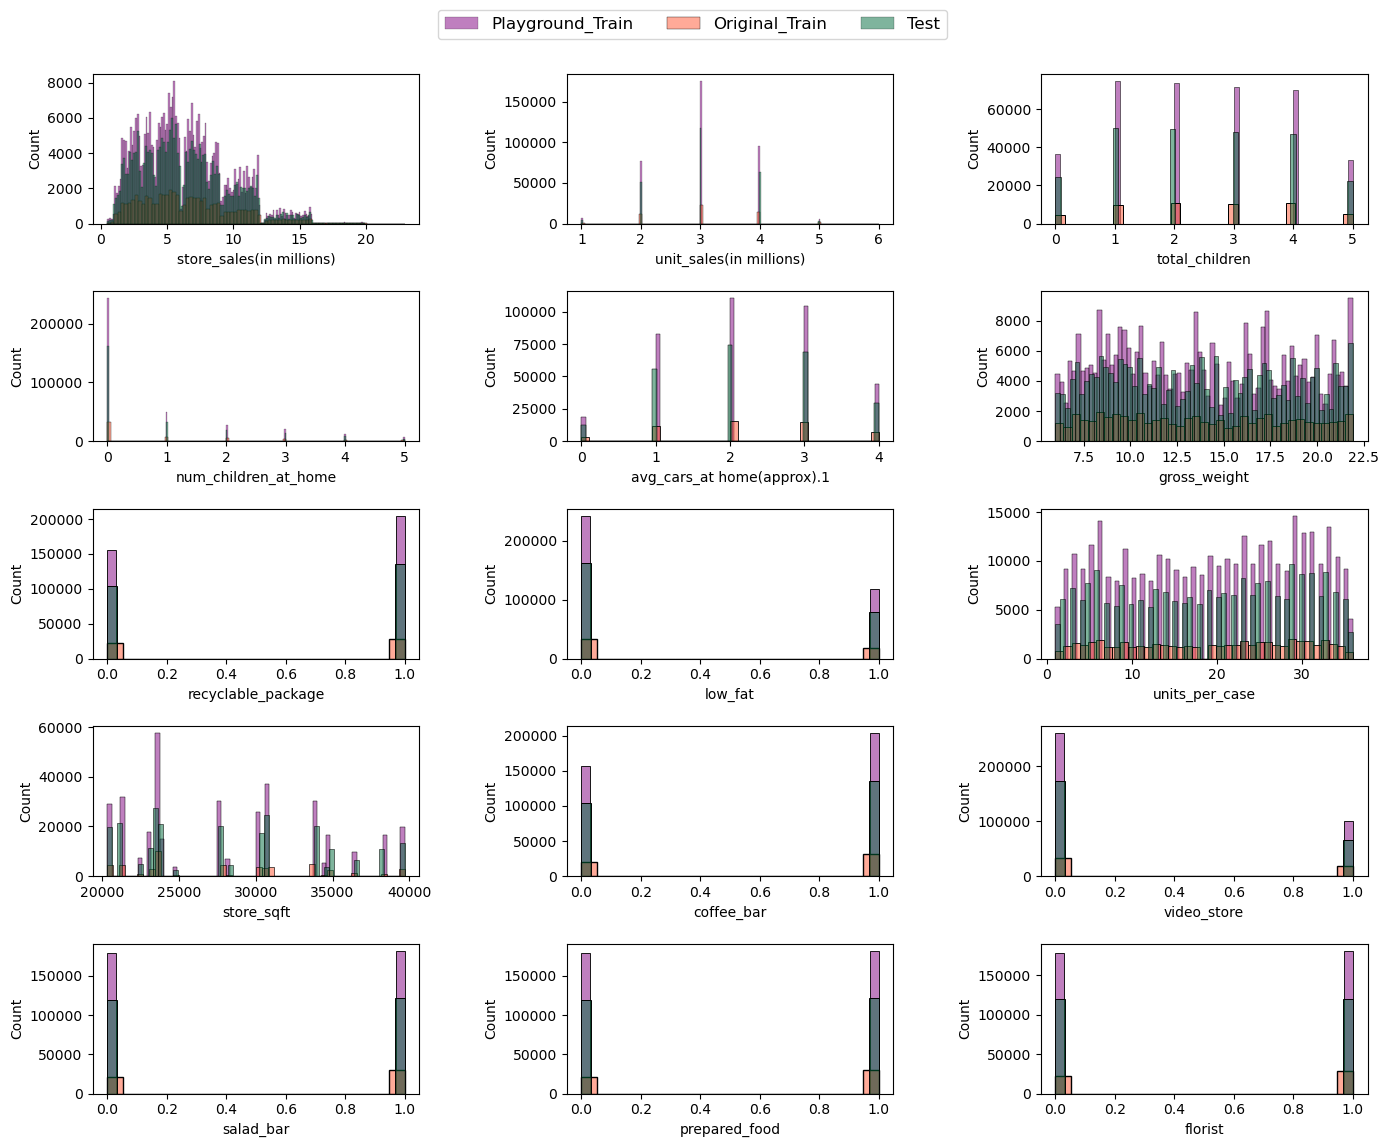

In [8]:
# Create multiple plots with a given size
fig = plt.figure(figsize=(15,12))

features = P_train_df.columns[1:-1]

# Create a countplot to evaluate the distribution
for i, feature in enumerate(features):
    ax = plt.subplot(5, 3, i+1)
    sns.histplot(x=feature, data=P_train_df, label="Playground_Train", color='#800080', ax=ax, alpha=0.5)
    sns.histplot(x=feature, data=O_train_df, label="Original_Train", color='#FF5733', ax=ax, alpha=0.5)
    sns.histplot(x=feature, data=P_test_df, label="Test", color='#006b3c', ax=ax, alpha=0.5)
#     ax.set_xlabel(feature, fontsize=12)

# Create the legend
fig.legend(labels=['Playground_Train', 'Original_Train', 'Test'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=12, ncol=3)

# Adjust the spacing between the subplots and the legend
fig.subplots_adjust(top=0.90, bottom=0.05, left=0.10, right=0.95, hspace=0.45, wspace=0.45)

plt.show()


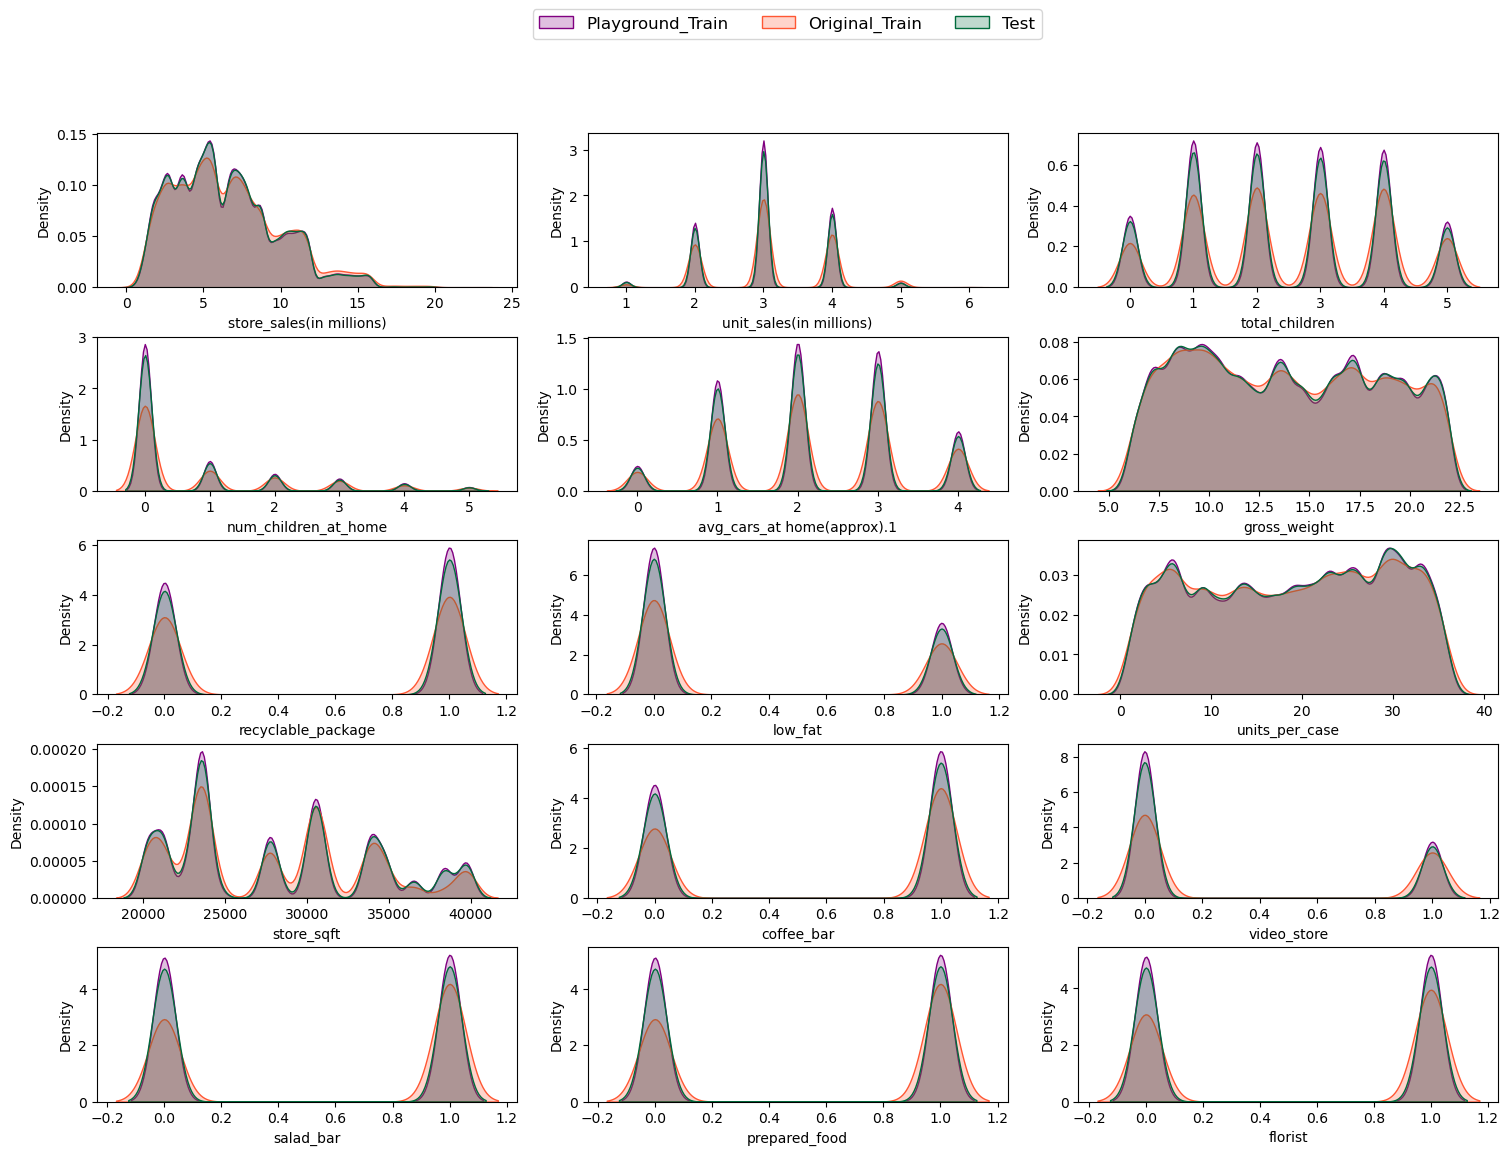

In [9]:
# Create multiple plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,12))
fig.tight_layout(pad=2)

fig.subplots_adjust(top=0.85)  # adjust top margin to make space for legend

features = P_train_df.columns[1:-1]

# Create a countplot to evaluate the distribution
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(x=feature, data=P_train_df, label="Playground_Train", color='#800080', fill=True, ax=ax)
    sns.kdeplot(x=feature, data=O_train_df, label="Original_Train", color='#FF5733', fill=True, ax=ax)
    sns.kdeplot(x=feature, data=P_test_df, label="Test", color='#006b3c', fill=True, ax=ax)
    
fig.legend(labels=['Playground_Train', 'Original_Train', 'Test'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=12, ncol=3)


<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">

<h3 align="left"><font color='#800080'>Insights:</font></h3>

- Based on the trend of distribution playground and orginal training set it seems logical to combine them together which was suggested in the description of the problem too.
- Comparison of different features in train and test dataset depict an identical distribution.
- Continuous and Categorical features could be identified.
- These features are binary: **recyclable_package, low_fat, coffee_bar, video_store, salad_bar, prepared_food, florist**
- These features have 5-6 distinct values and can be treated as categorical: **unit_sales(in millions), total_children, num_children_at_home, avg_cars_at home(approx).1**
- We got 4 Continuous features **store_sales(in millions), gross_weight, units_per_case, store_sqft**


> <a id="3.2"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 3.2 Categorical and Continues distribution</p>
Lets asses the distribution of categorical features in the train database closely.

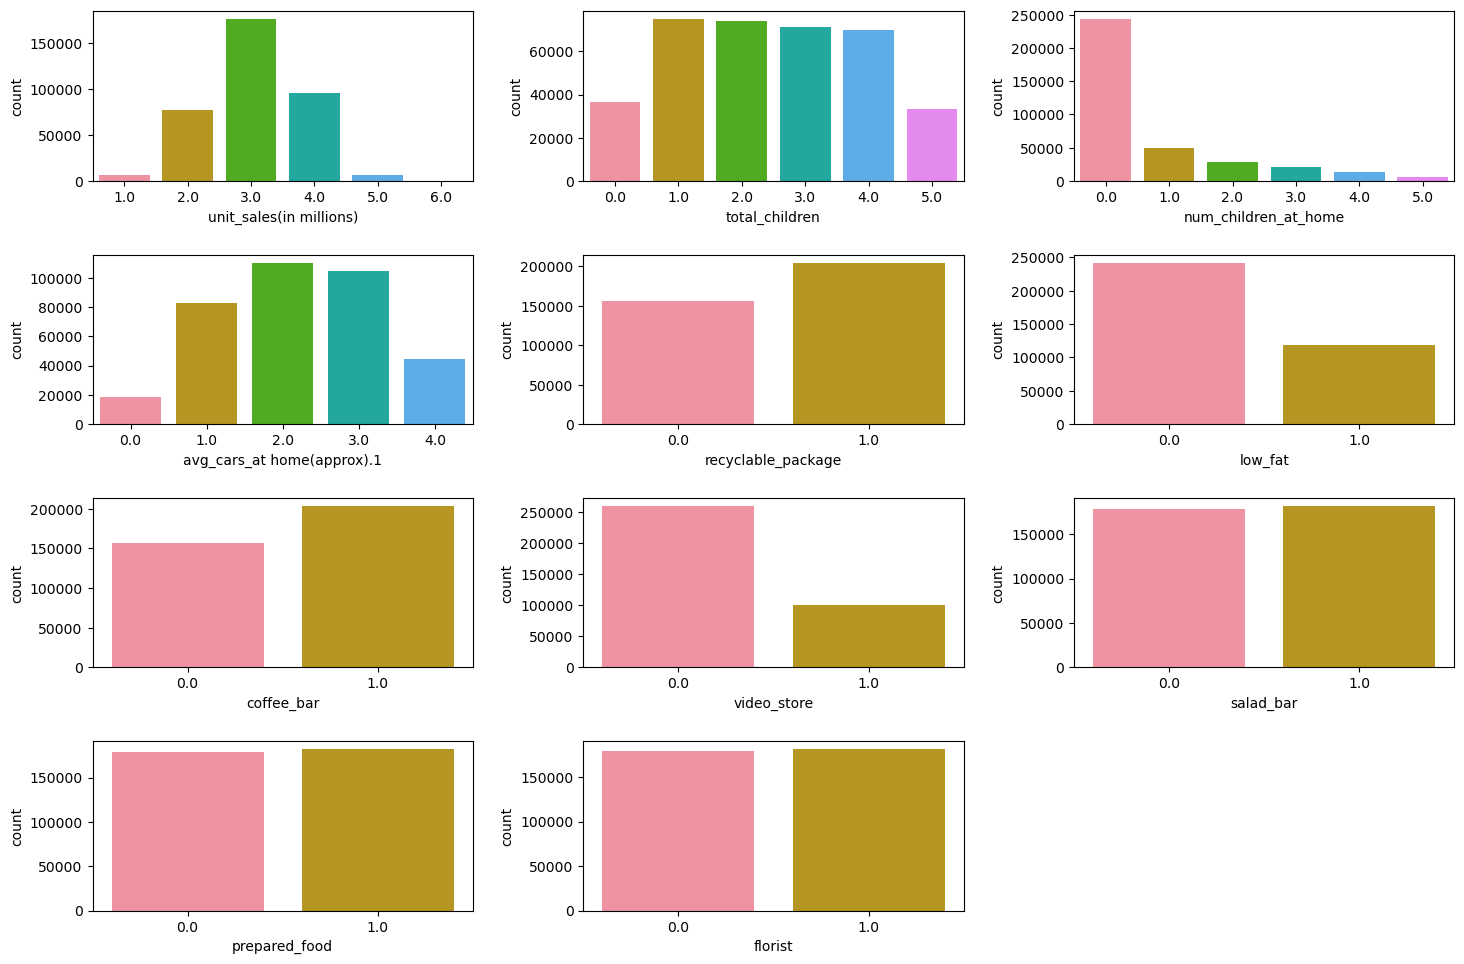

In [10]:
Continuous = ["store_sales(in millions)", "gross_weight", "units_per_case", "store_sqft"]
binary = ["recyclable_package", "low_fat", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist"]
categorical = ["unit_sales(in millions)", "total_children", "num_children_at_home", "avg_cars_at home(approx).1"]
categorical.extend(binary)

# Create a custom HUSL color palette with a different color
colors = sns.husl_palette(n_colors=6, s=1.0, l=0.7)

# Create multiple plots with a gicven size
fig = plt.figure(figsize=(15,10))


# Create a countplot to evaluate the distribution
for i, cat_feature in enumerate(categorical):
    ax = plt.subplot(4, 3, i+1)
    sns.countplot(x=cat_feature, data=P_train_df, palette=colors, ax=ax)

# Fitting the labels for each plot    
fig.tight_layout(pad=2)

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">

<h3 align="left"><font color='#800080'>Insights:</font></h3>

- Dataset has an even distribution regarding  **salad_bar**, **prepared_food**, **florist**.
- However **coffee_bar**, **recyclable_package** are mostly seen to be present.
- Moreover **video_store**, **low_fat** seems to be more likely to be zero in the dataset.
- **unit_sales** class 6 cannot really be identified.
- According to [@sergiosaharovskiy](https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e11-2023-eda-and-submission) **salad_bar** and **prepared_food** are almost the same and it might be good to remove either of them.

After the evaluation of distribution of categorical feature we can study the continuous features with histogram.

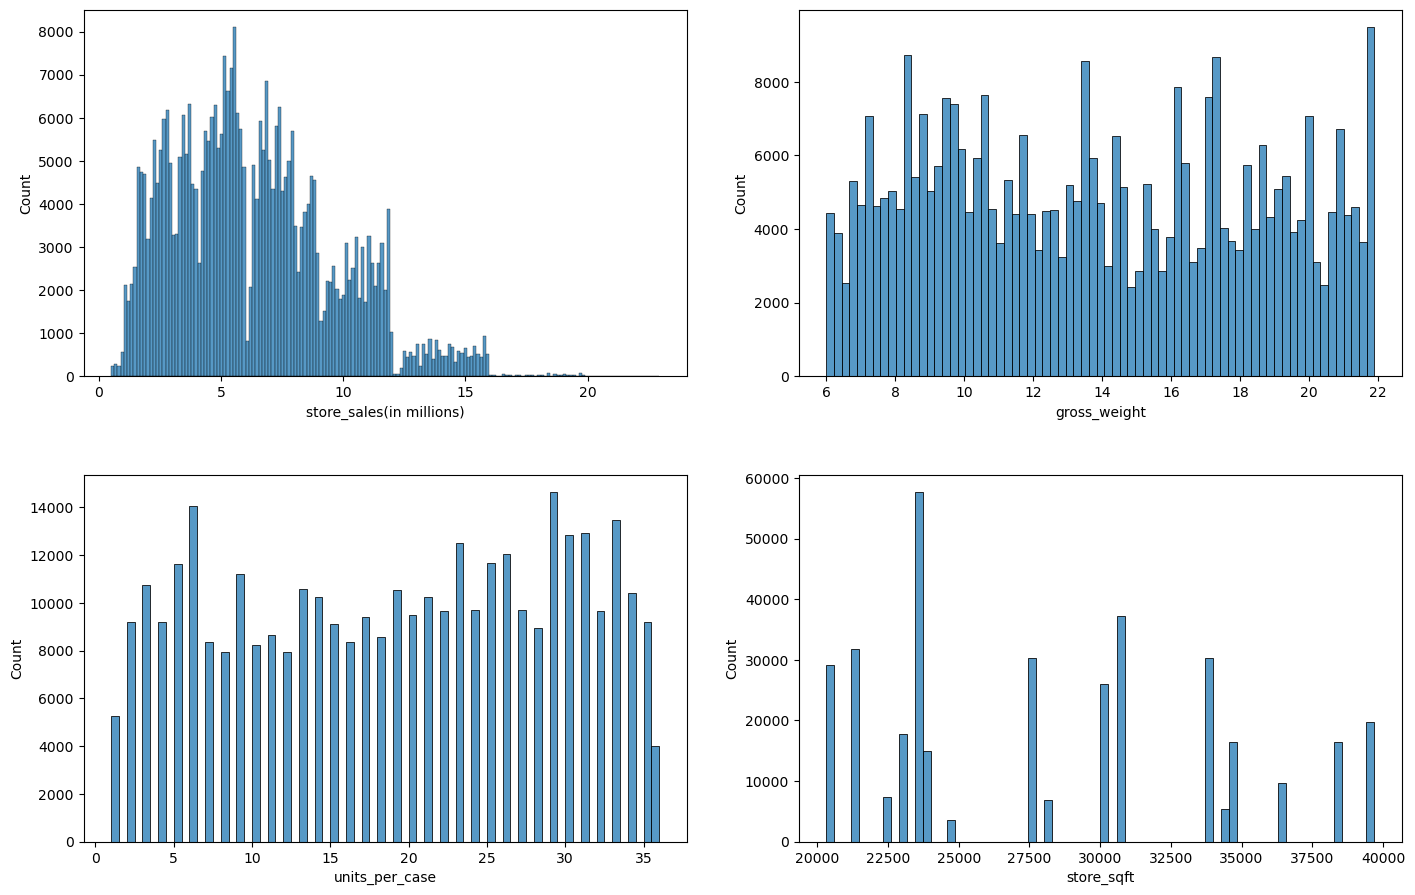

In [11]:
# Create multiple plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.tight_layout(pad=5)

# Create a countplot to evaluate the distribution
for i, num_feature in enumerate(Continuous):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(x=num_feature, data=P_train_df, ax=ax)

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">

<h3 align="left"><font color='#800080'>Insights:</font></h3>

- Considering the variation of **store_sales(in millions)** we can interpret that most of our data is around 5 million store_sales and as it gets higher our data starts to diminish.
- On the other hand, **gross_weight**, **units_per_case** seem to be distributed evenly.
- Moreover, **store_sqft** represent that most of the available data is about 22500 sqft.
- **store_sqft** feature got only 20 distinct values and **units_per_case** feature got only 30 distinct values.

> <a id="3.3"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 3.3 Target variable distribution</p>
The distribution of target value was studied to see it's effect and see how many unique values does the target has. [@janmpia notebook](https://www.kaggle.com/code/janmpia/what-you-need-to-know-about-this-competition) suggests that this problem seems not to be a regression problem because of the train dataset target values, but test set target values are unknown and therefor it seems to be a risky approach to consider this as an classificatin problem. This complication might be due to the synthetic nature of the dataset. 

In [12]:
target_col = "cost"

# Calculate the unique values, median, mean, and mode of the target variable
unique_values = len(P_train_df[target_col].unique())
maximum = P_train_df[target_col].max()
minimum = P_train_df[target_col].min()
median = P_train_df[target_col].median()
mean = P_train_df[target_col].mean()
mode = P_train_df[target_col].mode().values[0]

print(f'''
Target variable description
Number of unique_values = {unique_values}
Maximum = {maximum}
Minimum = {minimum}
Median = {median}
Mean = {mean}
Mode = {mode}
''')


Target variable description
Number of unique_values = 328
Maximum = 149.75
Minimum = 50.79
Median = 98.81
Mean = 99.61472939145688
Mode = 101.84



<AxesSubplot:xlabel='cost', ylabel='Count'>

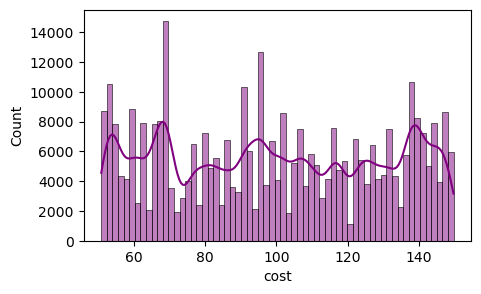

In [13]:
fig = plt.figure(figsize=(5,3))
sns.histplot(data=P_train_df, x="cost", kde=True, color='purple', alpha=0.5)

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">

<h3 align="left"><font color='#800080'>Insights:</font></h3>

    
- Looking in the distribution of **cost** we understand that  the distribution is skewed with multiple peaks and valleys and there are no outliers in the target variable.
- In this case, the presence of multiple local maxima and minima in the distribution may suggest that the factors that influence the outcome interact with each other in complex ways.
- **cost** has around 328 unique values which means that the target is somewhat continuous.

> <a id="3.4"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 3.4 Features and target variable relations</p>
Thirdly we can study the effect of different features on our target variable. For instance, let's see the effect of categorical features on the target value.

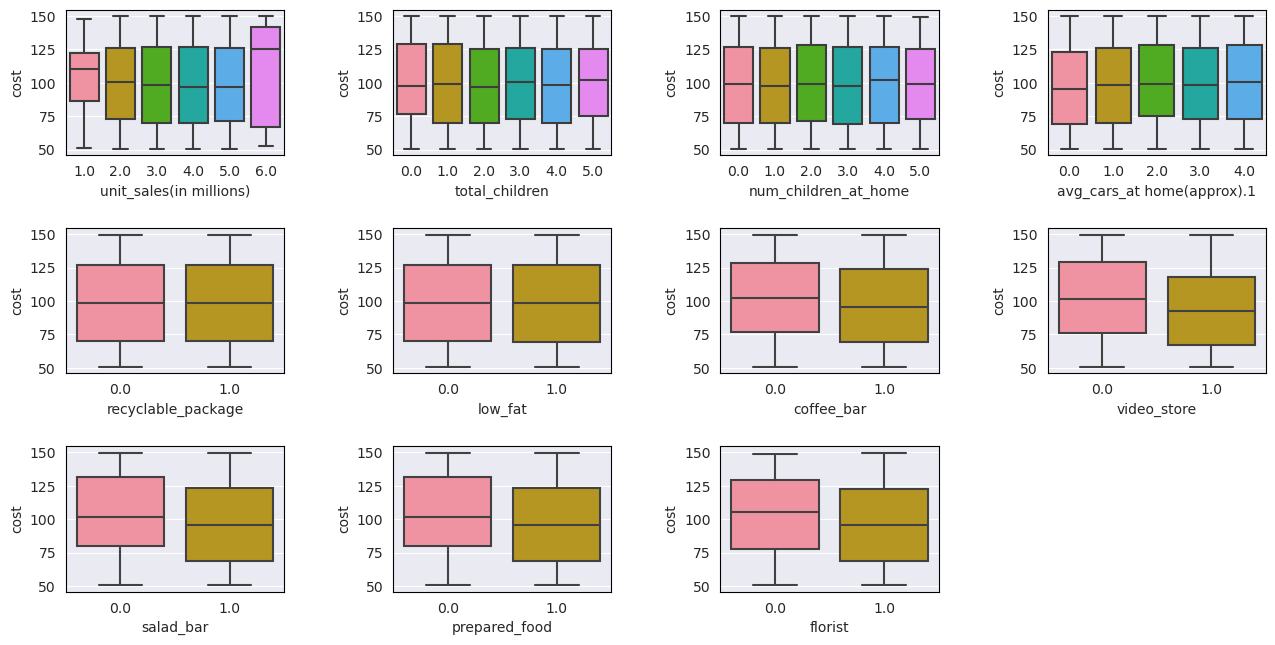

In [14]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a custom HUSL color palette with a different color
colors = sns.husl_palette(n_colors=6, s=1.0, l=0.7)

# Set the style
sns.set_style('darkgrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'})

# Create categorical features subplots
for i, cat_feature in enumerate(categorical):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(y="cost", x=cat_feature , data=P_train_df, ax=ax, palette=colors)
    
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=.5, wspace=0.5)

> <a id="3.5"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 3.5 Correlation Matrix</p>
Correlation matrix is always an important tool to understand the patterns between the features and understand the important features. In order to find a more descriptive explanation about this step you can use [@tolgayan notebook](https://www.kaggle.com/code/tolgayan/simple-yet-effective-lb-0-29475).

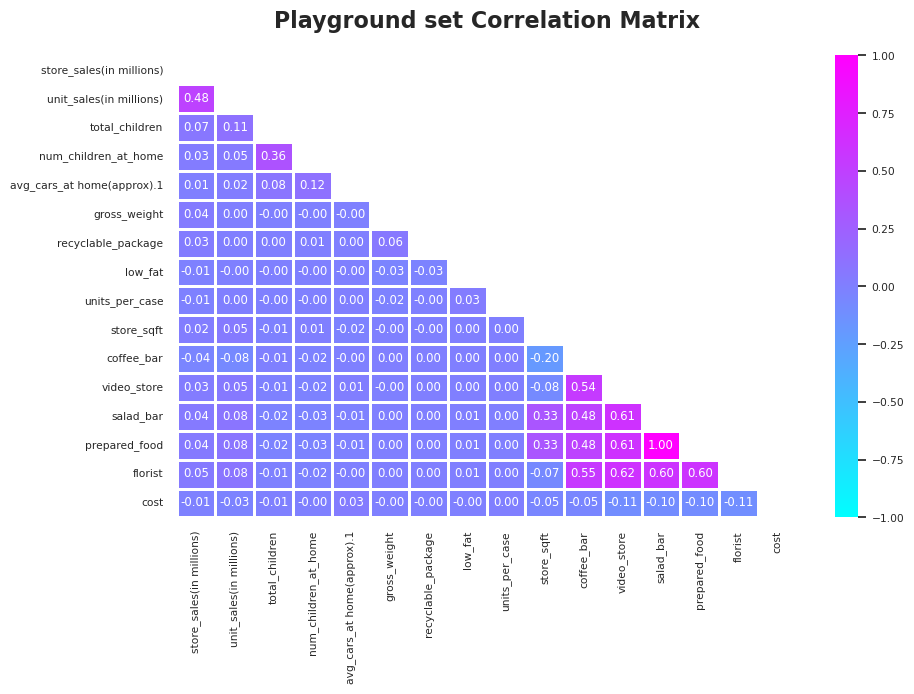

In [15]:
corr = P_train_df.iloc[:,1:].corr()

# create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap
plt.figure(figsize=(10, 6))
# set theme to change overall style
sns.set_theme(style="white", font_scale=0.7)
sns.heatmap(corr, cmap="cool", linewidths=2, mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Playground set Correlation Matrix", fontsize=16, weight = 'bold', pad=20)
plt.show()

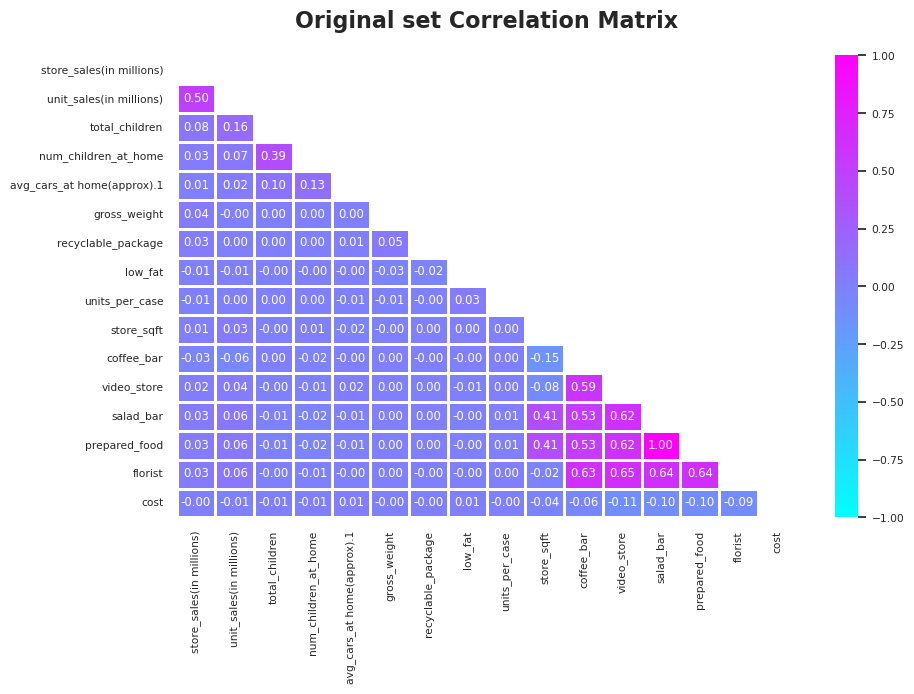

In [16]:
corr = O_train_df.iloc[:,:].corr()

# create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap
plt.figure(figsize=(10, 6))
# set theme to change overall style
sns.set_theme(style="white", font_scale=0.7)
sns.heatmap(corr, cmap="cool", linewidths=2, mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Original set Correlation Matrix", fontsize=16, weight = 'bold', pad=20)
plt.show()

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">

<h3 align="left"><font color='#800080'>Summary:</font></h3>
    
- **Salad_bar** and **prepared_food** are seems to be identical and there is a perfect correlation between them so it would be reasonable to remove one of them.
- As it was mentioned correlation matrix of original and playground training set suggest the same pattern and combination would be reasonable.
- All of features seems to have a low correlation coefficient, therefore they are unable to explain the cost singularly.



<a id="4"></a>
# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> 4. Data Preparation</p>

> <a id="4.1"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 4.1 Combine Origina and Playground</p>
Based on the explanatory data analysis combining the playground and original train dataset seems reasonable.

In [17]:
train_df = pd.concat([P_train_df, O_train_df], axis=0)
# remove id and prepared food
train_df.drop(columns=["id","prepared_food"], inplace=True)

# removing unit 6 from unit_sales(in millions)
train_df['unit_sales(in millions)'] = train_df['unit_sales(in millions)'].replace(6.0, 5.0)
P_test_df['unit_sales(in millions)'] = P_test_df['unit_sales(in millions)'].replace(6.0, 5.0)

train_df.tail()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,cost
51358,3.70,2.0,4.0,4.0,1.0,10.40,1.0,1.0,18.0,34452.0,1.0,0.0,0.0,1.0,147.17
51359,10.36,4.0,2.0,0.0,2.0,9.43,0.0,0.0,20.0,30797.0,1.0,1.0,1.0,1.0,92.57
51360,11.19,3.0,3.0,0.0,3.0,18.50,0.0,0.0,5.0,30797.0,1.0,1.0,1.0,1.0,92.57
51361,3.78,3.0,1.0,1.0,2.0,19.80,0.0,1.0,8.0,23598.0,0.0,0.0,0.0,1.0,135.92
51362,2.91,3.0,1.0,0.0,4.0,9.80,1.0,0.0,18.0,39696.0,0.0,0.0,1.0,0.0,129.50


In [18]:
train_df.shape

(411699, 15)

> <a id="4.2"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 4.2 Feature selection</p>

In [19]:
# Kudos to @tolgayan
# https://www.kaggle.com/code/tolgayan/simple-yet-effective-lb-0-29475

selected_features = [
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'florist',
]

> <a id="4.3"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 4.3 Feature engineering</p>

In [20]:
def feature_eng(df):
    # Ratio of children at home to total_children 
    df['children_per_adult']= df["num_children_at_home"] / df["total_children"]
    df['children_per_adult'].replace([np.inf, -np.inf], 10, inplace=True)
    df['children_per_adult'].fillna(0, inplace = True)

    # Weight per unit
    df["weight_per_unit"] = df["gross_weight"] / df["unit_sales(in millions)"]
    df['weight_per_unit'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Num of units sold per area
    df["Units_per_area"] = df["unit_sales(in millions)"] / df["store_sqft"]
    df['Units_per_area'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # sales per unit
    df['sales_per_unit'] = df["store_sales(in millions)"] / df["unit_sales(in millions)"]
    df['sales_per_unit'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # sales_per_unit_weight
    df['sales_per_unit_weight'] = df["store_sales(in millions)"] / df["gross_weight"]
    df['sales_per_unit_weight'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Sales per area of the shop
    df['sales_per_area'] = df["store_sales(in millions)"] / df["store_sqft"]
    df['sales_per_area'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Presence of any amenities
    df[['coffee_bar', 'video_store', 'low_fat', 'salad_bar', 'florist']] = df[['coffee_bar', 'video_store', 'low_fat', 'salad_bar', 'florist']].astype(int)

    df['any_amenities'] = df[['coffee_bar', 'video_store', 'salad_bar', 'florist']].any(axis=1)
    
    # Num of independent_children
    df['independent_children'] = df['total_children'] - df['num_children_at_home']
    df['independent_children'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Create a new feature for child-to-car ratio 
    # the transportation needs of households with children
    df['child_to_car_ratio'] = df['total_children'] / df['avg_cars_at home(approx).1']
    df['child_to_car_ratio'].replace([np.inf, -np.inf], 10, inplace=True)
    df['child_to_car_ratio'].fillna(0, inplace = True)

    # Create a new feature for healthy food options
    df['healthy_food_options'] = df['low_fat'] & df['salad_bar']
    
    # Create a new feature for customer age group
    df['customer_age_group'] = df['total_children'] / df['num_children_at_home']
    df['customer_age_group'].replace([np.inf, -np.inf], 10, inplace=True)
    df['customer_age_group'].fillna(0, inplace = True)
    
    # Percentage of low-fat items
    # df['pct_low_fat'] = (df['low_fat'].sum() / df['unit_sales(in millions)'].sum()) * 100
    # df['pct_low_fat'] = df['low_fat'].replace(np.nan, 0).replace(np.inf, 0) / pct_low_fat
    return df

In [21]:
train_df = feature_eng(train_df)
P_test_df = feature_eng(P_test_df)

In [22]:
print(f'''
{train_df.shape}
{P_test_df.shape}
''')


(411699, 26)
(240224, 27)



In [23]:
# check for NaN values
print(train_df.isna().sum())

# check for infinity values
print(np.isinf(train_df).sum())

store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
florist                       0
cost                          0
children_per_adult            0
weight_per_unit               0
Units_per_area                0
sales_per_unit                0
sales_per_unit_weight         0
sales_per_area                0
any_amenities                 0
independent_children          0
child_to_car_ratio            0
healthy_food_options          0
customer_age_group            0
dtype: int64
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1 

> <a id="4.4"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 4.4 Define X & y</p>

In [24]:
# Define a function to find X and y arrays for a given dataframe either test or train
def getXy(df,X_label=None,y_label=None,cat_label=None):
    # cases that X_label is not given and it is all the features except target 
    if X_label is None:
        X = df[[c for c in df.columns if c!=y_label]].values
    else:
        # Change the X array to one column when there is only one X_label
        if len(X_label) == 1:
            X = df[X_label].values.reshape(-1,1)
        else:
            # Find X based on the given X_labels when there are multiple X_labels
            X = df[X_label].values
    if y_label is None:
        # Create a zero array in the case of test set which we dont want the y_test
        y = np.zeros(df.shape[0]).reshape(-1,1)
    else:
        # calc target value and reshape it in a single column
#         y = df[y_label].values.reshape(-1,1)
        y = df[y_label].values
    # Feature Scaling
#     scaler = StandardScaler()
#     X = scaler.fit_transform(X)
        
    # Use One Hot encoding for categorical features
    if cat_label is None:
        # create a new dataframe with X and Y
        label = np.hstack((X_label,y_label))
        data = pd.DataFrame(np.hstack((X,y.reshape(-1,1))), columns=label)
    else: 
        data = pd.get_dummies(df, columns = cat_label)
    return data,X, y

In [25]:
# Scale the store_sqft column using MinMaxScaler
scaler = MinMaxScaler()
train_df['store_sqft'] = scaler.fit_transform(train_df[['store_sqft']])
P_test_df['store_sqft'] = scaler.fit_transform(P_test_df[['store_sqft']])

In [26]:
# engineer_labels = ['children_per_adult', 'weight_per_unit', 'Units_per_area', 'sales_per_unit',
#                    'sales_per_unit_weight', 'sales_per_area', 'any_amenities', 'independent_children',
#                    'child_to_car_ratio','healthy_food_options', 'customer_age_group']
engineer_labels = ['children_per_adult','independent_children','customer_age_group','any_amenities','child_to_car_ratio']
# engineer_labels = []
selected_features.extend(engineer_labels)
print(selected_features)

['total_children', 'num_children_at_home', 'avg_cars_at home(approx).1', 'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'florist', 'children_per_adult', 'independent_children', 'customer_age_group', 'any_amenities', 'child_to_car_ratio']


In [27]:
names = list(P_train_df.columns)
item_to_remove=['id','prepared_food','recyclable_package','store_sales(in millions)','units_per_case',
                'low_fat','gross_weight','unit_sales(in millions)','cost']
for i in item_to_remove:
    names.remove(i)
names.extend(engineer_labels)
features = [c for c in names if c!="cost"]
print(names)

['total_children', 'num_children_at_home', 'avg_cars_at home(approx).1', 'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'florist', 'children_per_adult', 'independent_children', 'customer_age_group', 'any_amenities', 'child_to_car_ratio']


In [28]:
train,X,y = getXy(train_df,X_label=names,y_label="cost")
print(X.shape)
print(y.shape)

(411699, 13)
(411699,)


In [29]:
test,X_,y_ = getXy(P_test_df,X_label=names)
print(X_.shape)
print(y_.shape)

(240224, 13)
(240224, 1)


> <a id="4.5"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 4.5 Splitting</p>

In [30]:
# Splitting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)
print(f"training set has {X_train.shape} examples and test set has {X_test.shape}")

training set has (329359, 13) examples and test set has (82340, 13)


<a id="5"></a>
# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> 5. Modeling</p>

In this section we try to use different regression models and use the **Root Mean Squared Log Error (RMSLE)** to evaluate each one and find the perefarable model. Therefore we are going to define a function to use **RMSLE** metrics.

In [31]:
RMSLE=[]
def rmsle(y, yhat):
    return mean_squared_log_error(y, yhat, squared=False)

> <a id="5.1"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.1 Linear Regression</p>

In [32]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)
# y_pred = lin_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.2"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.2 Lasso Regression</p>

In [33]:
# lasso_reg = Lasso(alpha=0.1)
# lasso_reg.fit(X_train, y_train)
# y_pred = lasso_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.3"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.3 Ridge Regression</p>

In [34]:
# ridge_reg = Ridge(alpha=1.0)
# ridge_reg.fit(X_train, y_train)
# y_pred = ridge_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.4"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.4 Random Forest</p>

In [35]:
# rf_reg = RandomForestRegressor()
# rf_reg.fit(X_train, y_train)
# y_pred = rf_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.5"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.5 Xgboost</p>

In [36]:
# xgb_reg = XGBRegressor()
# xgb_reg.fit(X_train, y_train)
# y_pred = xgb_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.6"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.6 LightGBM</p>

In [37]:
# lgbm_reg = LGBMRegressor()
# lgbm_reg.fit(X_train, y_train)
# y_pred = lgbm_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.7"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.7 CatBoost</p>

In [38]:
# catb_reg = CatBoostRegressor(verbose=0)
# catb_reg.fit(X_train, y_train)
# y_pred = catb_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.8"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.8 Extra Trees Regressor</p>

In [39]:
# ex_tree_reg = ExtraTreesRegressor(n_estimators=100, random_state=17)
# ex_tree_reg.fit(X_train, y_train)
# y_pred = ex_tree_reg.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.9"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.9 Mixing</p>

In [40]:
# # Option A Extra tree + Random forest
# y_pred = 0 * catb_reg.predict(X_test) + 0.3 * ex_tree_reg.predict(X_test) + \
# 0.7 * rf_reg.predict(X_test) + 0 * xgb_reg.predict(X_test) 

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

In [41]:
# # Option B Xgb + Random forest
# y_pred = 0 * catb_reg.predict(X_test) + 0 * ex_tree_reg.predict(X_test) + \
# 0.7 * rf_reg.predict(X_test) + 0.3 * xgb_reg.predict(X_test) 

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

In [42]:
# # Option C "CatB + Random forest"
# y_pred = 0.3 * catb_reg.predict(X_test) + 0 * ex_tree_reg.predict(X_test) + \
# 0.7 * rf_reg.predict(X_test) + 0 * xgb_reg.predict(X_test) 

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)


In [43]:
# # Option D "CatB + Xgboost"
# y_pred = 0.5 * catb_reg.predict(X_test) + 0 * ex_tree_reg.predict(X_test) + \
# 0 * rf_reg.predict(X_test) + 0.5 * xgb_reg.predict(X_test) 

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.10"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.10 NeuralNetwork</p>

In [44]:
# import tensorflow as tf

# nn_model = tf.keras.models.Sequential(
#     [
#         tf.keras.Input(shape=X_train.shape[1:]),
#         tf.keras.layers.Dense(units=64, activation='relu', name="L1"),
#         tf.keras.layers.Dense(units=64, activation='relu', name="L2"),
#         tf.keras.layers.Dense(units=32, activation='relu', name="L3"),
#         tf.keras.layers.Dense(units=1, activation='linear', name='Output')
#     ],name="simple"
# )

# nn_model.summary()

In [45]:
# def Rmsle(y_true, y_pred):
#     """
#     Root mean squared log error metric.
#     """
#     log_diff = tf.math.log1p(y_true) - tf.math.log1p(y_pred)
#     return tf.sqrt(tf.reduce_mean(tf.square(log_diff)))
# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# loss = tf.keras.losses.mean_squared_error
# nn_model.compile(optimizer=optimizer, loss=loss, metrics=[Rmsle])

In [46]:
# # Train model
# history = nn_model.fit(
#     X, y,
#     validation_split=0.2,
#     batch_size=32,
#     epochs=100,
#     verbose=0
# )

# # Make predictions
# y_pred = nn_model.predict(X_test)

# RMSLE.append(rmsle(y_test,y_pred)) 
# print(RMSLE)

> <a id="5.11"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.11 Models comparison</p>

In [47]:
# model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Random Forest",
#                "Xgboost",  "LightGBM", "Catboost", "Extra Trees Regressor",
#                "Extra tree + Random forest", "Xgb + Random forest", "CatB + Random forest",
#               "CatB + Xgboost", "Neural Network"]

# # Create a dictionary of model names and RMSLE values
# comp = dict(zip(model_names, RMSLE))

# # Sort the dictionary by values in ascending order
# sorted_comp = dict(sorted(comp.items(), key=lambda x: x[1]))

# # Extract the sorted model names and RMSLE values
# sorted_model_names = list(sorted_comp.keys())
# sorted_RMSLE = list(sorted_comp.values())

# # Create a figure
# plt.figure(figsize=(6,4))

# # Set set style
# sns.set_style(style="whitegrid")

# # Create a horizontal bar plot
# sns.barplot(x=sorted_RMSLE, y=sorted_model_names, palette='plasma')

# # Add labels to your graph
# plt.xlabel('RMSLE metrics', labelpad=10, fontsize=12)
# plt.ylabel('Models', labelpad=10, fontsize=12)
# plt.title("Comparison between different models",fontsize=14)
# plt.show()

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">

<h3 align="left"><font color='#800080'>Insights:</font></h3>
    
- **Random Forest regressor** shows a lower prediction for RMSLE
- Mixing **CatBoost** with **Random Forest regressor** seems to be a good idea.



> <a id="5.12"></a>
## <p style="font-family:'Roboto'; text-align:left; font-size:20px; font-weight:500; color: #4B0082; text-align:left; padding:10px; border-bottom: 3px solid #4B0082"> 5.12 Feature Importance</p>

In [48]:
# # credits to @sureshmecad
# # https://www.kaggle.com/code/sureshmecad/feature-importance-hr-analytics?scriptVersionId=62644959

# feature_imp = pd.Series(xgb_reg.feature_importances_, index=names).sort_values(ascending=False)

# # Creating a bar plot
# sns.barplot(x=feature_imp, y=feature_imp.index, palette='plasma')

# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #c8a2c8; font-size:100%; font-family:Roboto; text-align:left">

<h3 align="left"><font color='#800080'>Insights:</font></h3>
    
- **store_sqft** seems to be more significant.



<a id="6"></a>
# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> 6. Model tuning</p>
Due to the large computational cost of randome forest regressor model Xgboost was chosen to tune.

In [49]:
best_params = {'n_estimators': 100, # not imp
             'learning_rate': 0.95, # + or - bad
             'max_depth': 15, # - bad + bad
             'lambda': 0.017, # + bad 
             'alpha': 1.0e-08, # - is little good
             'colsample_bytree': 0.7, # imp (adding randomness to the training process.)
             'subsample': 1.0,
             'min_child_weight': 0, # + bad
             'booster': 'gbtree',
             'grow_policy': 'depthwise', 
             'tree_method': 'gpu_hist',
             'objective': 'reg:squaredlogerror',
             'eval_metric': 'rmsle',
             'early_stopping_rounds': 10, # not imp
             'random_state': RANDOM_STATE}


tune_xgb_reg = XGBRegressor(**best_params)

# Define a validation set for early stopping
eval_set = [(X_test, y_test)]

# Train the model with early stopping
tune_xgb_reg.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred = tune_xgb_reg.predict(X_test)

RMSLE.append(rmsle(y_test,y_pred)) 
print(RMSLE)

[0.29333549321793834]


<a id="7"></a>
# <p style="  padding:20px; border:5px Outset #EBEBEB; background-color:#4B0082; font-family:'Roboto'; text-align:left; font-size:25px; font-weight:500; color: #EBEBEB"> 7. Submission</p>

In [50]:
y_sub = tune_xgb_reg.predict(X_)
Export = np.hstack((np.reshape(P_test_df["id"].values, (-1,1)), np.reshape(y_sub, (-1,1))))
Submission = pd.DataFrame(Export, columns=["id", "cost"])
Submission.to_csv(r'submission.csv', index=False, header=["id", "cost"])
Submission.shape

(240224, 2)

In [51]:
Submission.head()

,id,cost
0,360336.0,90.251053
1,360337.0,94.684273
2,360338.0,94.278938
3,360339.0,98.244514
4,360340.0,78.513603


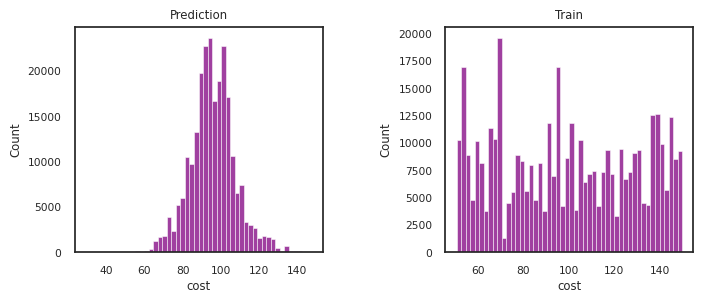

In [52]:
## Comparison between predicted and train distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.histplot(data=Submission, x="cost", label='Prediction', color='purple', bins=50, ax=axes[0])
sns.histplot(data=train_df, x="cost", label='Train', color='purple', bins=50, ax=axes[1])

axes[0].set_title('Prediction')
axes[1].set_title('Train')

fig.tight_layout(pad=5)
plt.show()

Predicted model doesn't seem to be that good!